In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib as mpl

%matplotlib inline


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 200)

In [2]:
import os, sys
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
default_dir = "/content/gdrive/My Drive"
df_train = pd.read_csv(os.path.join(default_dir,"train.csv")) # 학습용 데이터
df_test = pd.read_csv(os.path.join(default_dir,"submission.csv")) # 테스트 데이터(제출파일의 데이터)

# lead_owner
- 결측치 없음
- Frequency Encoding


In [4]:
df_train['lead_owner'].isnull().sum()

0

In [5]:
df_train['lead_owner'].value_counts()

174     4627
175     4120
97      2499
23      2453
194     2208
42      1215
96       981
185      880
363      839
115      734
38       693
125      690
402      490
108      487
124      468
816      464
341      462
167      459
100      457
0        429
68       427
16       413
487      405
176      374
40       355
342      346
662      327
422      326
27       317
359      305
205      304
39       304
15       301
279      294
441      281
25       272
155      271
103      270
233      265
374      257
405      246
393      238
589      237
46       235
21       228
831      227
78       223
436      219
148      216
642      215
153      215
694      213
654      208
384      204
187      200
45       198
788      195
638      180
717      171
29       168
414      165
391      163
81       153
285      151
214      151
344      150
71       150
388      148
225      148
166      146
480      146
798      145
435      145
20       144
234      143
423      142
268      142

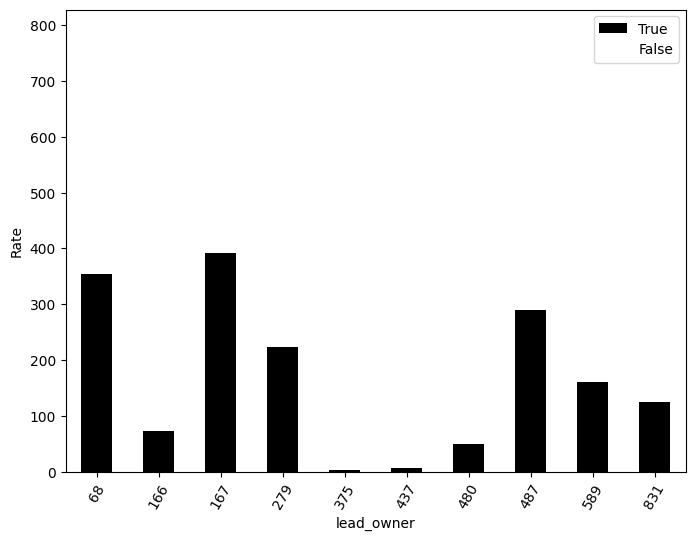

In [6]:
sales_success = df_train[df_train['is_converted'] == True].groupby('lead_owner')['is_converted'].count().sort_values(ascending=False)

top_10 = df_train[df_train['lead_owner'].isin(sales_success.head(10).index)]

success_failure = top_10.groupby(['lead_owner', 'is_converted']).size().unstack(fill_value=0)
success_failure['True'] = success_failure[True] / success_failure[True] + success_failure[False]
success_failure['False'] = success_failure[False] / success_failure[True] + success_failure[False]

success_failure[['True', 'False']].plot(kind='bar', stacked=True, figsize=(8, 6), color=['black', 'white'])
plt.xlabel('lead_owner')
plt.ylabel('Rate')
plt.xticks(rotation=60)
plt.legend()
plt.show()

In [7]:
combined_df = pd.concat([df_train, df_test])

lead_owner_freq_encoding = combined_df['lead_owner'].value_counts(normalize=True).to_dict()

df_train['lead_owner'] = df_train['lead_owner'].map(lead_owner_freq_encoding)
df_test['lead_owner'] = df_test['lead_owner'].map(lead_owner_freq_encoding)